In [2]:
import numpy as np

**Cwiczenia zad 9/ zestaw2_prawdopodobienstwo**
Rozważ grę wykorzystującą generator liczb losowych losujący w
sposób niezależny i równomierny liczby losowe z ciągłego przedziału między 1 a 100. Gra zaczyna się
z sumą S = 0. Pierwszy gracz dodaje do S liczby losowe wygenerowane kolejno z generatora, dopóki
S > 100, i zapisuje ostatnią wygenerowaną liczbę x. Następnie, gracz drugi kontynuuje dodawanie do
S liczb losowych z generatora, dopóki S > 200, i zapisuje ostatnią wygenerowaną liczbę y. Gracz z
większą liczbą wygrywa, np. jeśli y > x, to wygrywa gracz drugi. Czy gra jest sprawiedliwa? Napisz
program symulujący 100,000 gier i oszacuj za jego pomocą, z dokładnością do 3 miejsc po przecinku,
prawdopodobieństwo, że gracz drugi wygra.

In [3]:
from numpy.random import uniform
def game():
    S=0
    player_1_last=None
    player_2_last=None
    curr=None
    while S<=100:
        curr = uniform(1, 100)
        S += curr
    player_1_last = curr
    while S<=200:
        curr = uniform(1, 100)
        S += curr
    player_2_last = curr

    return player_1_last < player_2_last

np.sum([game() for i in range(10**5)]) / 10**5

0.52673

Widzimy, że gracz drugi ma większą szanse, by wygrać. Wynik symulacji to 52.613% prawdopodobieństwa, że gracz drugi wygra.

**Zad. 36. Wykład** Używając wybranego pakietu komputerowego przeprowadzić eksperyment
polegający na wylosowaniu 100-elementowej próbki z rozkładu wykładniczego
o średniej λ = 0.2, a następnie (na jej podstawie) wyznaczeniu
jądrowego estymatora gęstości.

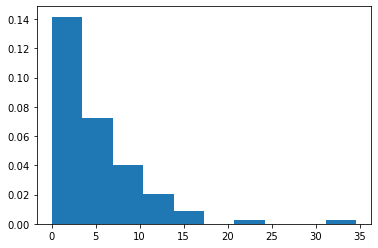

In [14]:
import matplotlib.pyplot as plt
lambda_ = 0.2
scale_ = 1/lambda_
from scipy.stats import expon
X = expon.rvs(scale=scale_,size=100)
plt.hist(X,density=True)
plt.show()

In [24]:
import pandas as pd
X = pd.DataFrame(X)

<AxesSubplot:ylabel='Density'>

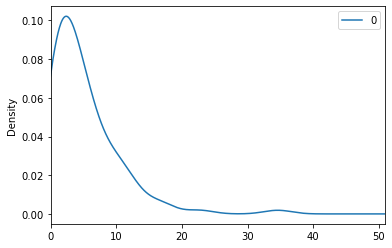

In [23]:
X.plot.kde(bw_method='scott',xlim=(0,51))

<AxesSubplot:ylabel='Density'>

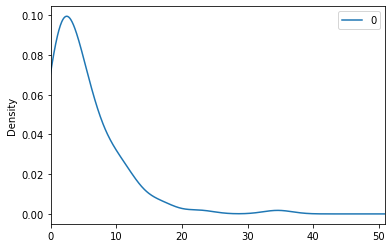

In [22]:
X.plot.kde(bw_method='silverman',xlim=(0,51))

**Zad. 37. Wykład** Używając wybranego pakietu komputerowego wykonać 100 razy następujący
eksperyment: z rozkładu jednostajnego na przedziale [0, 10] losujemy
30 liczb i obliczamy wartości statystyk 2¯X oraz n+1
n max{X1, . . . ,Xn}. Otrzymujemy
dwa ciągi liczb, powiedzmy a1, . . . , a100 oraz b1, . . . , b100. Dla każdego z
tych dwóch ciągów obliczyć średnią i wariancję. Który z użytych estymatorów
okazał się lepszy?

In [28]:
from scipy.stats import uniform
An = []
Bn=[]
for i in range(10000):
    N=30
    sample = np.random.uniform(0,10,N)
    An.append(2*np.mean(sample))
    Bn.append((N+1)/(N)*np.max(sample))

print(f"An : {np.mean(An)}, variance: {np.var(An)}")
print(f"Bn : {np.mean(Bn)}, variance: {np.var(Bn)}")
print(f"True 2*mean: {2*uniform.mean(0,10)}")

An : 9.993218807133669, variance: 1.1140042135468664
Bn : 9.999793348885719, variance: 0.10640035207510509
True 2*mean: 10.0


$B_n \;$ jest lepszy- latwo zobaczyc ze MSE dla $B_n$ jest nizszy (wariancja i lepszy wynik estymacji)

**Zad. 2/ zestaw 3**. W grze bierze udział r graczy, przy czym i-ty gracz posiada $n_i$ żetonów, $n_i > 0$. W każdej turze wybieranych jest losowo dwóch graczy, a zwycięzca zabiera jeden żeton przegranemu. Gracz, który zostanie bez żetonów jest eliminowany z gry, która jest kontynuowana, dopóki jeden gracz nie zbierze wszystkich $n=\sum n_i r_i$ żetonów. Ten gracz wygrywa całą grę. Zakładając, że wyniki rozgrywek w kolejnych turach są od siebie niezależne, a w każdej z nich szanse na wygraną każdego z dwóch graczy są jednakowe (1/2), znajdź $P_i$ – prawdopodobieństwo, że całą grę wygra gracz i-ty.
W celu rozwiązania zadania przeprowadź symulację komputerową. Eksperymentuj z różnymi początkowymi układami żetonów, dla każdego układu przeprowadź wystarczająco dużo symulacji, aby otrzymać wiarygodne wyniki (np. 10,000 symulacji).

In [39]:
N = 10 # ilu zawodnikow
trials = 10000    # ile prob
def experiment(tokens,no_players,no_trials):
    def game(tokens):
        choice_players = [i for i in range(0,no_players)]
        while len(choice_players) > 1:
            winner, loser = np.random.choice(choice_players,replace=False,size=2)
            tokens[winner] += 1
            tokens[loser] -= 1
            if tokens[loser] == 0:
                choice_players.remove(loser)
        return choice_players[0]    # ostatni przy stole z zetonami
    result = [game(tokens) for _ in range(no_trials)]
    return {'results': result,'mean': np.mean(result),'variance':np.var(result)}

In [41]:
# 1
tokens = np.ones(N)
print(f"wszyscy maja 1 na poczatku: {experiment(tokens,N,trials)}")

wszyscy maja 1 na poczatku: {'results': [2, 2, 2, 1, 1, 9, 2, 2, 2, 2, 9, 3, 9, 9, 9, 7, 3, 2, 9, 0, 0, 0, 4, 4, 4, 0, 5, 4, 4, 4, 4, 2, 6, 4, 6, 0, 2, 2, 9, 9, 9, 9, 9, 2, 2, 8, 0, 0, 0, 0, 0, 0, 0, 4, 9, 9, 9, 5, 5, 4, 1, 1, 1, 1, 1, 1, 1, 4, 7, 7, 3, 8, 0, 0, 7, 7, 7, 7, 7, 7, 7, 6, 8, 8, 8, 8, 8, 8, 8, 8, 9, 2, 9, 2, 5, 3, 3, 2, 6, 6], 'mean': 4.44, 'variance': 10.2864}


In [53]:
# 2
f1 = lambda x: np.exp(x)
random_sample = np.array(np.random.uniform(1,5,N))
#tokens = f1(random_sample)
tokens = f1(random_sample)
print(f"eksponent: {experiment(np.int_(tokens),N,trials)}")

eksponent: {'results': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 7, 7, 7, 7], 'mean': 3.77, 'variance': 2.9770999999999996}


In [55]:
#3
f2 = lambda x: 2*x
random_sample = np.random.uniform(1,10,N)
tokens = f2(random_sample)
print(f"funkcja liniowa: {experiment(np.int_(tokens),N,trials)}")

KeyboardInterrupt: 

In [ ]:
#4
f3 = lambda x: x**2
random_sample = np.random.uniform(1,10,N)
tokens = f3(random_sample)
print(f"funkcja kwadratowa: {experiment(np.int_(tokens),N,trials)}")